In [28]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import os
import librosa
import librosa.display
import glob 
import skimage

In [29]:
X_train = np.load('/Users/gokseld/Downloads/UrbanSound8K/X_train.npy',"r")
Y_train = np.load('/Users/gokseld/Downloads/UrbanSound8K/Y_train.npy',"r")
X_test = np.load('/Users/gokseld/Downloads/UrbanSound8K/X_test.npy',"r")
Y_test = np.load('/Users/gokseld/Downloads/UrbanSound8K/Y_test.npy',"r")

In [30]:
model = Sequential()

In [31]:
input_dim = (16, 8, 1)

In [32]:
model.add(Conv2D(64, (3, 3), padding = "same", activation = "tanh", input_shape = input_dim))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding = "same", activation = "tanh"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(1024, activation = "tanh"))
model.add(Dense(10, activation = "softmax"))

In [33]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [34]:
result = model.fit(X_train, Y_train, epochs = 100, batch_size = 50, validation_data = (X_test, Y_test))

Epoch 1/100
  5/131 [>.............................] - ETA: 1s - loss: 2.2801 - accuracy: 0.2120 

2022-10-07 16:27:21.471199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


131/131 [==============================] - ETA: 0s - loss: 1.5319 - accuracy: 0.4784

2022-10-07 16:27:23.497954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


131/131 [==============================] - 3s 17ms/step - loss: 1.5319 - accuracy: 0.4784 - val_loss: 1.2853 - val_accuracy: 0.5634
Epoch 2/100
131/131 [==============================] - 2s 16ms/step - loss: 1.1545 - accuracy: 0.6102 - val_loss: 1.1776 - val_accuracy: 0.6005
Epoch 3/100
131/131 [==============================] - 2s 15ms/step - loss: 0.9598 - accuracy: 0.6708 - val_loss: 1.0719 - val_accuracy: 0.6436
Epoch 4/100
131/131 [==============================] - 2s 16ms/step - loss: 0.8420 - accuracy: 0.7204 - val_loss: 1.0905 - val_accuracy: 0.6693
Epoch 5/100
131/131 [==============================] - 2s 16ms/step - loss: 0.7620 - accuracy: 0.7433 - val_loss: 0.9468 - val_accuracy: 0.7105
Epoch 6/100
131/131 [==============================] - 2s 17ms/step - loss: 0.6938 - accuracy: 0.7732 - val_loss: 0.8931 - val_accuracy: 0.7242
Epoch 7/100
131/131 [==============================] - 2s 16ms/step - loss: 0.6163 - accuracy: 0.7951 - val_loss: 0.8993 - val_accuracy: 0.7151
Epoc

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 16, 8, 64)         640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 4, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 4, 128)         73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 2, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 4, 2, 128)         0         
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

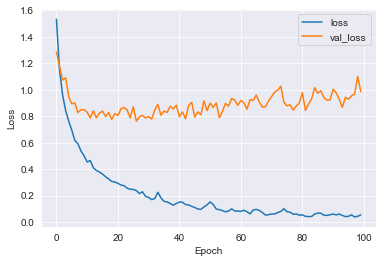

In [36]:
# Plot the the training loss
plt.plot(result.history["loss"],label="loss")

# Plot the the validation loss
plt.plot(result.history["val_loss"],label="val_loss")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")
# Put legend table
plt.legend()

# Show the plot
plt.show()

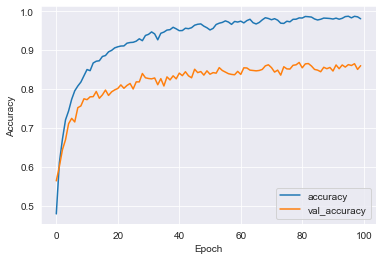

In [37]:
# Plot the the training accuracy
plt.plot(result.history["accuracy"], label="accuracy")

# Plot the the validation accuracy
plt.plot(result.history["val_accuracy"], label="val_accuracy")
# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# Put legend table
plt.legend()

# Show the plot
plt.show()

In [38]:
predictions = model.predict(X_test[[16,8,1]])
score = model.evaluate(X_test, Y_test)
print(score)

15/69 [=====>........................] - ETA: 0s - loss: 0.7826 - accuracy: 0.8646

2022-10-07 16:30:44.391667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


69/69 [==============================] - 1s 8ms/step - loss: 0.9840 - accuracy: 0.8598
[0.9840149879455566, 0.8598259687423706]


In [39]:
# Make prediction on the reshaped sample
# Find the predicted class
predicted_class = predictions.argmax()
# Find the prediction probability
predicted_probility = predictions.max()

In [40]:
print(f"This image belongs to class {predicted_class} with {predicted_probility} probability %")

This image belongs to class 9 with 0.999660849571228 probability %
